 #  Imports
 Here are all import statements. Fastai library has been used in the project because of its simplicity and robust friendly nature (so to speak).

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline


In [3]:

import sys
sys.path.append(r"..\..\..\fastai")
import fastai
import seaborn as sns


from fastai import *
from fastai.tabular import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [4]:
PATH = r"C:\Users\mammanten\Downloads\train"

In [5]:
%ls {PATH}

 Volume in drive C has no label.
 Volume Serial Number is FADD-30D6

 Directory of C:\Users\mammanten\Downloads\train

08/10/2019  05:32 PM    <DIR>          .
08/10/2019  05:32 PM    <DIR>          ..
07/29/2015  08:42 PM     1,248,430,084 train.csv
               1 File(s)  1,248,430,084 bytes
               2 Dir(s)  17,825,918,976 bytes free


In [6]:
types = {'Id': 'int8',
'minutes_past': 'int64',
'adardist_km': 'float32',
'Ref' :'float32',
'Ref_5x5_10th': 'float32',
'Ref_5x5_50th' :'float32',
'Ref_5x5_90th':'float32',
'RefComposite':'float32',
'RefComposite_5x5_10th':'float32',
'RefComposite_5x5_50th' : 'float32',
'RefComposite_5x5_90th' :'float32',
'RhoHV' :'float32',
'RhoHV_5x5_10th': 'float32',
'RhoHV_5x5_50th' : 'float32',
'RhoHV_5x5_90th':'float32',
'Zdr' :'float32',
'Zdr_5x5_10th':'float32',
'Zdr_5x5_50th' :'float32',
'Zdr_5x5_90th' :'float32',
'Kdp' :'float32',
'Kdp_5x5_10th':'float32',
'Kdp_5x5_50th' :'float32',
'Kdp_5x5_90th':'float32',
'Expected' :'float32'}

# The Datasets
This dataset was downloaded from kaggle from a competition (How much did it rain?II). It contains data from polarimetric radars and it is to be used to predict the amount of rainfall over a period of time. However, the code doesn't try to to get the very accurate value like the competition would entail rather it tries to show how random forest can be used for prediction

In [7]:

%time df_one = pd.read_csv(r"C:\Users\mammanten\Downloads\train\train.csv", dtype = types)

Wall time: 51.1 s


# The Training data

In [8]:
df_one.head()

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
1,1,16,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
2,1,25,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
3,1,35,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
4,1,45,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254


In [9]:
%time df_one1 = pd.read_csv(r"C:\Users\mammanten\Downloads\test (1)\test.csv", dtype = types)

Wall time: 24.5 s


# The Test data

In [10]:
df_one1.head()

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
0,1,1,8.0,NaN,NaN,NaN,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5,8.0,10.0,NaN,10.0,18.0,11.5,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,8,8.0,NaN,NaN,7.0,14.5,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,12,8.0,14.0,NaN,9.0,16.0,14.0,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,15,8.0,10.5,NaN,9.0,15.5,13.5,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The next few lines sees the a handful of rows picked from the data for analysis. This is done so as to test with various partitions or ranges of the data and an average rmse is calculated in the end. Also, since this was done with a CPU, it's only natural so as not to oer burden the system

In [11]:
df_one = df_one[13200000:13500000]

In [12]:
df_one1 = df_one1[7000000:7012000]

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text xticklabel objects>)

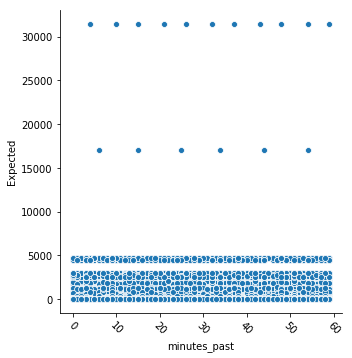

In [13]:
sns.relplot(x = 'minutes_past', y = 'Expected', data = df_one)
plt.xticks(rotation=-45)

In [14]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [15]:
%time df_one.Expected = np.log(df_one.Expected)

Wall time: 11.8 s


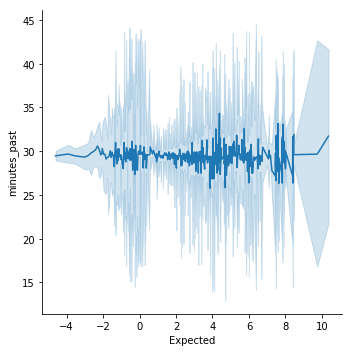

In [16]:
sns.relplot(x = "Expected", y = "minutes_past", data = df_one, kind='line')

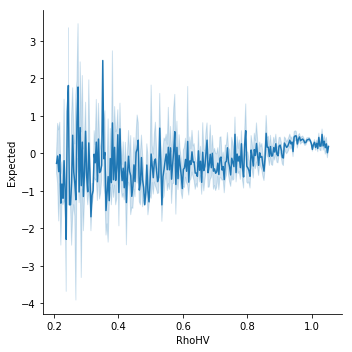

In [17]:
sns.relplot(x='RhoHV', y = 'Expected', data = df_one, kind = 'line')

# Using the proc_df funtion
This function from the fastai library replaces categorical values with numeric values. It also splits the dependent variable into a separate variable. This also makes the data "good enough" to be passed into the random forest. 

In [18]:
 df, y, nas= proc_df(df_one, 'Expected')


In [19]:
df_test, y_test, nas = proc_df(df_one1)

# Final Score
Our final random forest score and a plot to show the predicted values

In [20]:

m= RandomForestRegressor(n_jobs=1)
%time m.fit(df, y)
m.score(df, y)


C:\Users\mammanten\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 35 s


0.7276754479074428

In [21]:
L = m.predict(df_test)

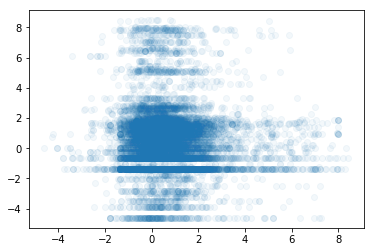

In [22]:
plt.scatter(L[:12000], y[:12000], alpha = 0.05)

In [23]:
Predicted = pd.DataFrame({'Id':df_one1['Id'], 'Expected':L})

In [24]:
display_all(Predicted)

,Id,Expected
7000000,62,1.762156
7000001,62,1.854271
7000002,62,1.940694
7000003,62,1.697560
7000004,62,1.442426
7000005,62,0.813539
7000006,62,1.625866
7000007,62,0.840912
7000008,63,0.932165
7000009,63,0.932165
